<a href="https://colab.research.google.com/github/sensiboi/PRODIGY_ML/blob/main/PRODIGY_ML_02_Grouping_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grouping Customer**

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(42)
num_customers=1000
purchase_frequency = np.random.randint(1, 11, size=num_customers)
total_amount_spent = np.random.uniform(10, 500, size=num_customers)
customer_data = pd.DataFrame({
    'CustomerID': range(1, num_customers + 1),
    'Purchase Frequency': purchase_frequency,
    'Total Amount Spent': total_amount_spent
})
customer_data.to_csv('Mall_Customers.csv', index=False)
print(customer_data.head())

   CustomerID  Purchase Frequency  Total Amount Spent
0           1                   7          135.447611
1           2                   4          365.786837
2           3                   8          300.551824
3           4                   5           60.084205
4           5                   7          460.187756


K MEANS CLUSTERING

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
X = data[['Purchase Frequency', 'Total Amount Spent']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

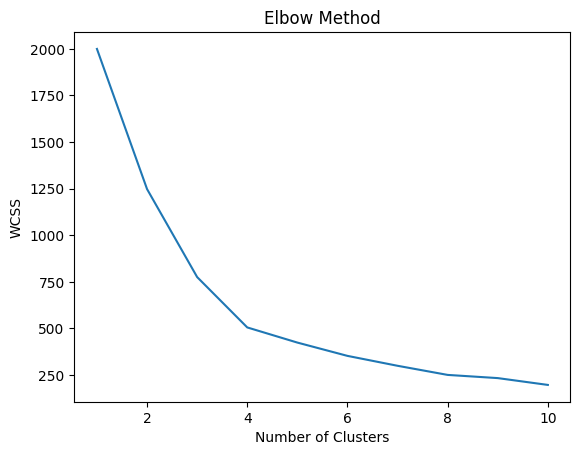

In [9]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

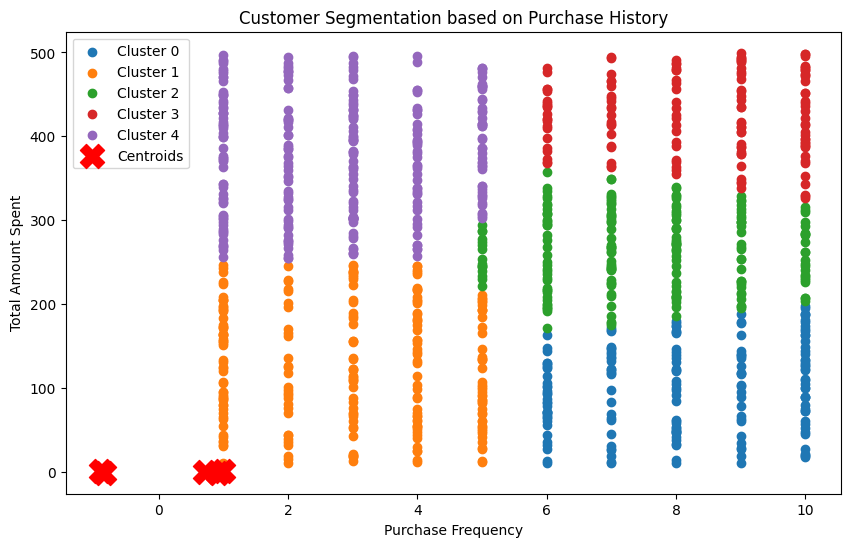

In [11]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Purchase Frequency'], cluster_data['Total Amount Spent'], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Amount Spent')
plt.legend()
plt.show()